In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
from sklearn import metrics
import seaborn as sns


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

In [5]:
d=pd.read_csv("E:\churn-bigml-80.csv")


In [6]:
d.shape

(2666, 20)

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
State                     2666 non-null object
Account length            2666 non-null int64
Area code                 2666 non-null int64
International plan        2666 non-null object
Voice mail plan           2666 non-null object
Number vmail messages     2666 non-null int64
Total day minutes         2666 non-null float64
Total day calls           2666 non-null int64
Total day charge          2666 non-null float64
Total eve minutes         2666 non-null float64
Total eve calls           2666 non-null int64
Total eve charge          2666 non-null float64
Total night minutes       2666 non-null float64
Total night calls         2666 non-null int64
Total night charge        2666 non-null float64
Total intl minutes        2666 non-null float64
Total intl calls          2666 non-null int64
Total intl charge         2666 non-null float64
Customer service calls    2666 non-null int64


In [8]:
d.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
d.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
d['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [11]:
d.isnull().sum()  # no null values

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

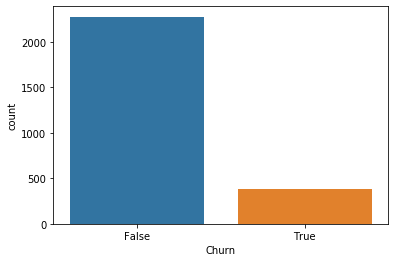

In [12]:
sn.countplot(x='Churn',data=d)

In [13]:
print('Churn = False', round(d['Churn'].value_counts()[0]/len(d) * 100,2), '% of the dataset')
print('Churn = True', round(d['Churn'].value_counts()[1]/len(d) * 100,2), '% of the dataset') # Highly skewed data set

Churn = False 85.45 % of the dataset
Churn = True 14.55 % of the dataset


In [22]:
categorical = d.select_dtypes(include=['object'])
categorical


,State,International plan,Voice mail plan
0,KS,No,Yes
1,OH,No,Yes
2,NJ,No,No
3,OH,Yes,No
4,OK,Yes,No
...,...,...,...
2661,SC,No,No
2662,AZ,No,Yes
2663,WV,No,No
2664,RI,No,No


In [23]:

df_categorical=d[['State','International plan','Voice mail plan','Churn']]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,State,International plan,Voice mail plan,Churn
0,16,0,1,0
1,35,0,1,0
2,31,0,0,0
3,35,1,0,0
4,36,1,0,0


In [24]:
d = d.drop(df_categorical.columns, axis=1)
d= pd.concat([d, df_categorical], axis=1)
d.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,State,International plan,Voice mail plan,Churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,16,0,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,35,0,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,31,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,35,1,0,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,36,1,0,0


### EDA - Histogram

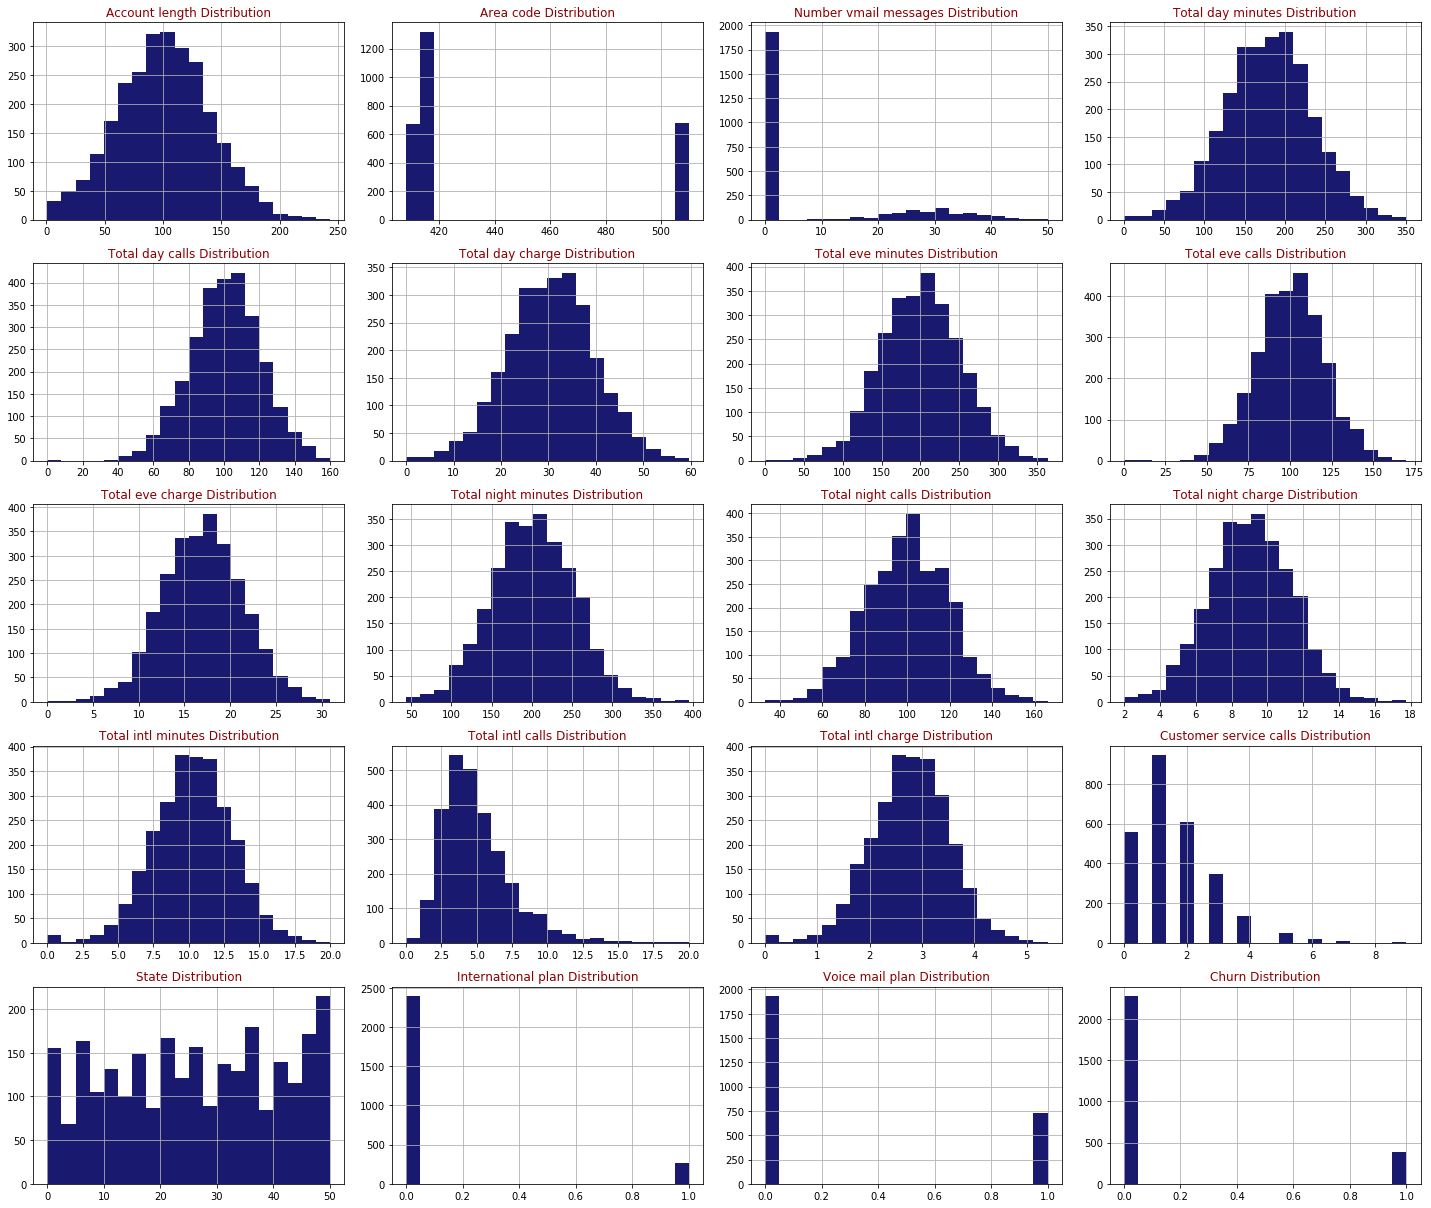

In [20]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(d,d.columns,6,4)

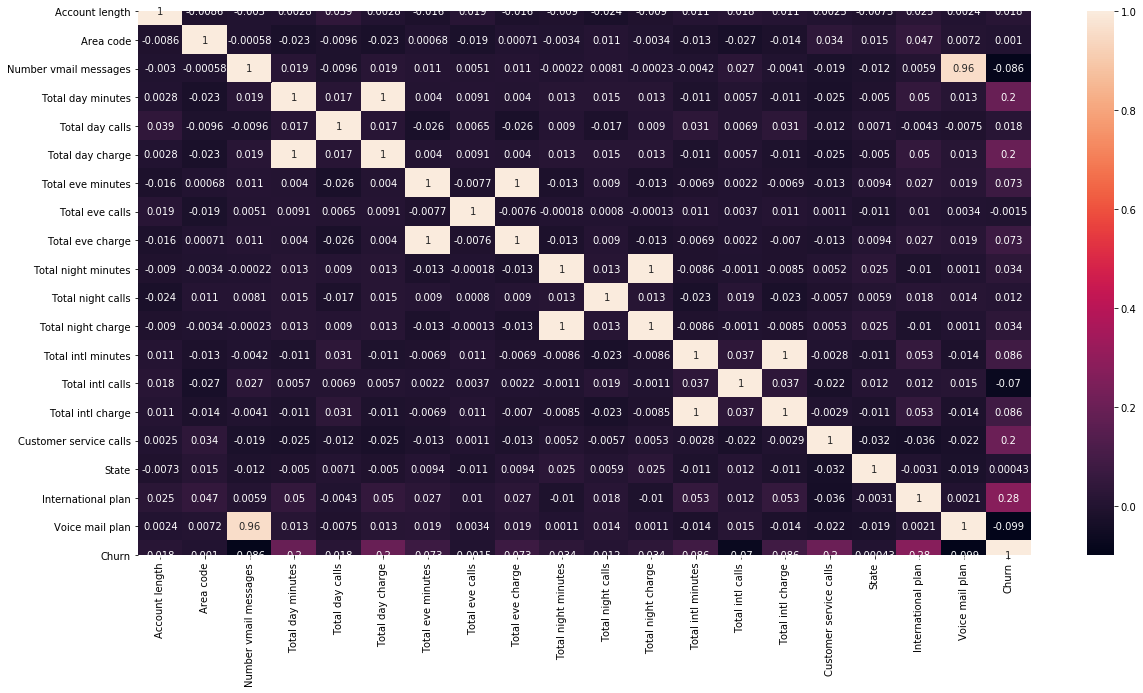

In [24]:

plt.figure(figsize= (20, 10))
sns.heatmap(d.corr(),annot = True)

In [62]:
X = d.drop('Churn', axis=1)
y = d['Churn']

In [75]:
# feature selection reduces the accuracy. only 8-9 feautres are selected.

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

Train: [ 523  524  525 ... 2663 2664 2665] Test: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
original_Xtrain = scaler.fit_transform(original_Xtrain)
original_Xtest = scaler.fit_transform(original_Xtest)


In [81]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [82]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)

In [83]:
print("Before OverSampling, counts of label '1': {}".format(sum(original_ytrain == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(original_ytrain == 0))) 
  
    
print("After OverSampling, counts of label '1': {}".format(sum(ysm_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(ysm_train == 0))) 

Before OverSampling, counts of label '1': 310
Before OverSampling, counts of label '0': 1823 

After OverSampling, counts of label '1': 1823
After OverSampling, counts of label '0': 1823


In [84]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() 
logreg.fit(Xsm_train, ysm_train) 
predictions = logreg.predict(original_Xtest) 
  
# print classification report 
print(classification_report(original_ytest, predictions)) 

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       455
           1       0.37      0.77      0.50        78

    accuracy                           0.78       533
   macro avg       0.66      0.77      0.68       533
weighted avg       0.87      0.78      0.80       533



In [85]:
import sklearn

In [86]:
sklearn.metrics.accuracy_score(original_ytest,predictions)

0.776735459662289

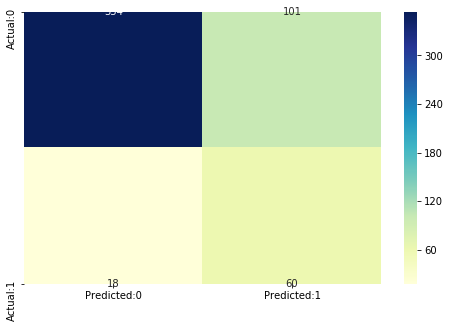

In [87]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(original_ytest,predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [88]:

TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [89]:
print(TN)

354


In [90]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.776735459662289 

 The Miss-classification = 1-Accuracy =  0.22326454033771104 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.7692307692307693 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.778021978021978 

 Positive Predictive value = TP / (TP+FP) =  0.37267080745341613 

 Negative predictive Value = TN / (TN+FN) =  0.9516129032258065 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  3.4653465346534658 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.29661016949152536


In [91]:
y_pred_prob = logreg.predict_proba(original_Xtest)[:, 1]

In [104]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(original_Xtest)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(original_ytest,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[ 79 376]
 [  2  76]] 
 with 155 correct predictions and 2 Type II errors( False Negatives) 

 Sensitivity:  0.9743589743589743 Specificity:  0.17362637362637362 



With 0.2 threshold the Confusion Matrix is  
 [[170 285]
 [  7  71]] 
 with 241 correct predictions and 7 Type II errors( False Negatives) 

 Sensitivity:  0.9102564102564102 Specificity:  0.37362637362637363 



With 0.3 threshold the Confusion Matrix is  
 [[240 215]
 [  9  69]] 
 with 309 correct predictions and 9 Type II errors( False Negatives) 

 Sensitivity:  0.8846153846153846 Specificity:  0.5274725274725275 



With 0.4 threshold the Confusion Matrix is  
 [[310 145]
 [ 13  65]] 
 with 375 correct predictions and 13 Type II errors( False Negatives) 

 Sensitivity:  0.8333333333333334 Specificity:  0.6813186813186813 





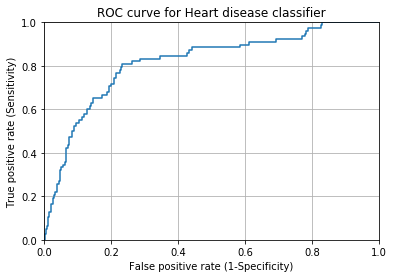

In [105]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(original_ytest, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [106]:
sklearn.metrics.roc_auc_score(original_ytest, y_pred_prob_yes[:,1])

0.8157790927021695

In [108]:
cm2=0                   # 0.1 threshold can be used
y_pred_prob_yes=logreg.predict_proba(original_Xtest)
y_pred2=binarize(y_pred_prob_yes,0.1)[:,1]
cm2=confusion_matrix(original_ytest,y_pred2)
print ('With',0.1,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[ 79 376]
 [  2  76]] 
 with 155 correct predictions and 2 Type II errors( False Negatives) 

 Sensitivity:  0.9743589743589743 Specificity:  0.17362637362637362 





## Decision Tree

In [112]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#metrics
from statistics import mean
from sklearn.metrics import accuracy_score 
from sklearn.metrics import explained_variance_score as evs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import os

In [109]:
X = d.drop('Churn', axis=1)
y = d['Churn']

In [126]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=5, min_samples_leaf=5)

giniDecisionTree.fit(Xsm_train, ysm_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [127]:
giniPred = giniDecisionTree.predict(original_Xtest) 

In [128]:
print('Accuracy Score: ',accuracy_score(original_ytest, giniPred))

Accuracy Score:  0.8968105065666041


In [129]:
print('Classification Report')
print(classification_report(original_ytest, giniPred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       455
           1       0.61      0.82      0.70        78

    accuracy                           0.90       533
   macro avg       0.79      0.87      0.82       533
weighted avg       0.91      0.90      0.90       533



### Entropy as criterian

In [149]:
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy',random_state = 100,max_depth=5, min_samples_leaf=5)

In [150]:
entropyDecisionTree.fit(Xsm_train, ysm_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [151]:
entropyPred = entropyDecisionTree.predict(original_Xtest)

In [152]:
print('Accuracy Score: ',accuracy_score(original_ytest, entropyPred))

Accuracy Score:  0.9024390243902439


In [153]:
print(classification_report(original_ytest, entropyPred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       455
           1       0.64      0.74      0.69        78

    accuracy                           0.90       533
   macro avg       0.80      0.84      0.82       533
weighted avg       0.91      0.90      0.91       533



### Random forest

In [158]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV

In [159]:
fit_rf = RandomForestClassifier(random_state=42)

In [182]:
import time
import random
np.random.seed(100)
start = time.time()

param_dist = {'max_depth': [2, 3, 4,5,6,7,8],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 5,param_grid=param_dist, n_jobs = 3)

cv_rf.fit(Xsm_train, ysm_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}
Time taken in grid search:  1394.01


In [198]:
fit_rf.set_params(criterion = 'entropy',max_features = 'auto',max_depth = 8,bootstrap = 'False',min_samples_leaf=5)

RandomForestClassifier(bootstrap='False', ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [215]:
fit_rf.set_params(n_estimators=1000,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [216]:
fit_rf.fit(Xsm_train, ysm_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [217]:
predictions_rf = fit_rf.predict(original_Xtest)

In [218]:
print('Accuracy Score: ',accuracy_score(original_ytest, predictions_rf))

Accuracy Score:  0.9061913696060038


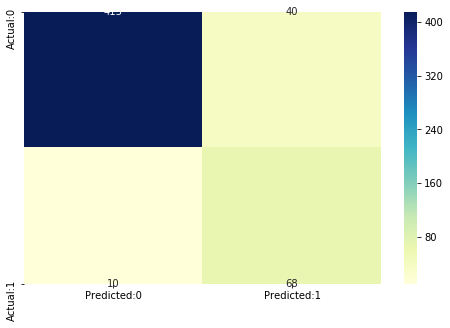

In [219]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(original_ytest,predictions_rf)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [220]:

TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [221]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.9061913696060038 

 The Miss-classification = 1-Accuracy =  0.09380863039399623 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.8717948717948718 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9120879120879121 

 Positive Predictive value = TP / (TP+FP) =  0.6296296296296297 

 Negative predictive Value = TN / (TN+FN) =  0.9764705882352941 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  9.916666666666664 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.14056224899598393


In [222]:
print(classification_report(original_ytest, predictions_rf))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       455
           1       0.63      0.87      0.73        78

    accuracy                           0.91       533
   macro avg       0.80      0.89      0.84       533
weighted avg       0.93      0.91      0.91       533



In [223]:
y_pred_prob_yes=fit_rf.predict_proba(original_Xtest)

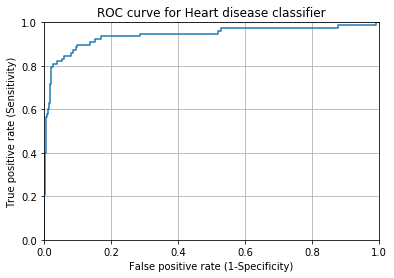

In [224]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(original_ytest, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [225]:
sklearn.metrics.roc_auc_score(original_ytest, y_pred_prob_yes[:,1])

0.9406311637080869